In [ ]:
%pip install pandas matplotlib
%pip install tensorflow keras scikit-learn

Size of the train set: (45000, 784)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

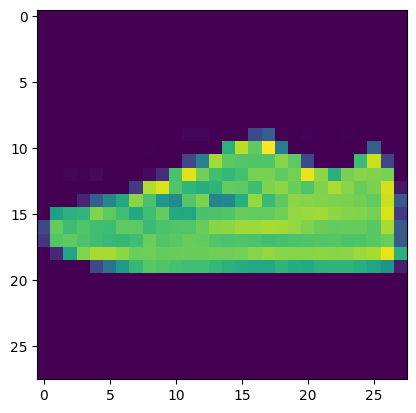

In [29]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

print('Size of the train set:', X_train.shape)

plt.imshow(X_val[0].reshape(28, 28))
Y_val[0]

## Original Model

In [ ]:
from keras import activations
from keras.utils import set_random_seed
from keras.layers import Dense, Input
from keras.models import Sequential

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((784,)))
model.add(Dense(512, activation=activations.relu))
model.add(Dense(128, activation=activations.relu))
model.add(Dense(64, activation=activations.relu))
model.add(Dense(10, activation=activations.softmax))

model.summary()

<bound method Model.summary of <Sequential name=sequential_7, built=True>>

In [31]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.5618 - val_accuracy: 0.8559 - val_loss: 0.4153
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.3967 - val_accuracy: 0.8583 - val_loss: 0.3951
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8716 - loss: 0.3480 - val_accuracy: 0.8520 - val_loss: 0.4115
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8822 - loss: 0.3192 - val_accuracy: 0.8764 - val_loss: 0.3429
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8913 - loss: 0.2959 - val_accuracy: 0.8783 - val_loss: 0.3281
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8951 - loss: 0.2854 - val_accuracy: 0.8848 - val_loss: 0.3178
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8974 - loss: 0.2734 - val_accuracy: 0.8849 - val_loss: 0.3153
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9026 - loss: 0.2575 - val_accuracy: 0.

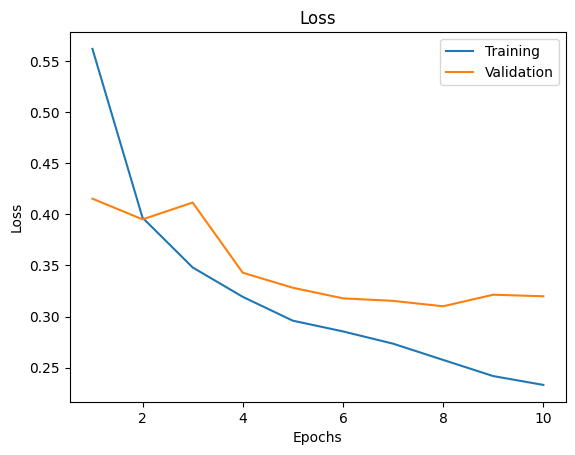

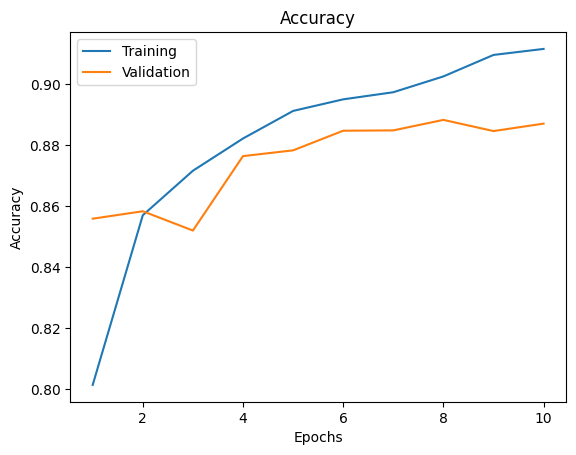

In [32]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(history)
plot_accuracy(history)